### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríjanse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)



# Tarea 2: Filtrado de señales

## Introducción


Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) en función del tiempo correspondiente a la actividad eléctrica del corazón. Cada etapa del ciclo cardíaco es representado por una letra: **P, Q, R, S y T**. La siguiente figura muestra un esquema de un ECG con dos pulsos.

<img src="cardio.png" width="600">


El ECG se usa para hacer diagnósticos y en particular para analizar la existencia de anormalidades en el ciclo cardiaco. La **frecuencia cardiaca**, es decir el inverso del intervalo RR, de un humano normal en reposo está en el rango de **60 y 100 latidos por minuto**

## Enunciado

El hospital base de Valdivia tiene un electrocardiógrafo que mide la ECG en miliVolts [mV] a una frecuencia de muestreo de $360$ [Hz]

Durante el proceso de captura ciertos errores provocaron que la señal se contamine con 

- **(A)** Un ruido asociado al sistema eléctrico
- **(B)** Un ruido de baja frecuencia causado por un desperfecto del sensor
- **(C)** Un ruido blanco de origen térmico 

Esto complica el análisis del médico por lo que el hospital base los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

<IPython.core.display.Javascript object>


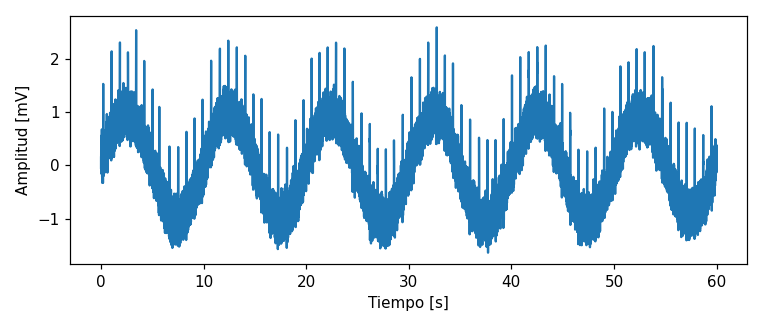

In [1]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt

with open("ECG.pkl", "rb") as f:data = pickle.load(f)

Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

## Análisis (15%)

- Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 
- Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases
- En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?

### 1.1 Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 

<IPython.core.display.Javascript object>


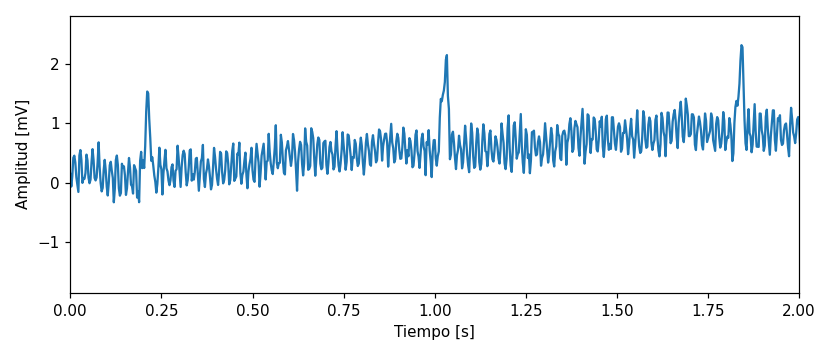

In [2]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlim([0,2]);
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

__R__: El electrocardiograma es la representacion gráfica de la actividad bioeléctrica del musculo cardíaco, en el primer esquema podemos observar la línea isoeléctrica o línea basal, que normalmente se encuentra en el trazo que sigue a la onda T y precede a la siguiente onda P, línea que no podemos identificar en la señal entregada. La onda P es la señal eléctrica que corresponde a la despolarización auricular. El  complejo  QRS  corresponde  a  la  corriente  eléctrica  que  causa  la despolarización ventricular, este intervalo es el que más claramente podemos observar en la señal, siendo el lóbulo principal. La onda T representa la repolarización  de  los  ventrículos. 
Debido a la perturbación C, no se permite la correcta lectura del ritmo cardíaco, no podemos identificar el intervalo RR o la línea isoeléctrica correctamente, lo que no nos permite identificar claramente cada etapa del ciclo cardíaco, haciendo que se confundan las señales entre si. La perturbación B hace que la señal tenga una tendencia a subir y no seguir una línea como vemos en el esquema. Tales perturbaciones deben ser corregidas para poder separar la parte útil de la señal del ruido que se añade debido a las influencias externas. 

El ruido blanco es una señal aleatoria sin correlación. La presencia de este tipo de sonidos hace que los estímulos auditivos más intensos no se perciban por completo, es decir, que las otras señales no se destaquen por encima de él, su gráfica es plana, esta señal contiene todas y todas muestran la misma potencia. Este ruido, forma en el gráfico de espectro un tipo de "piso" que mientras más fuerte sea, más alto será y "cubrirá" la señal que se está buscando.

Una señal puede mostrar un patrón o una tendencia hacia ciertos datos que no son intrínsecos, la tendencia en las señales pueden dificultar el analisis de los datos, en los primeros dos segundos podemos ver una tendencia lineal. Esta debe eliminarse para un correcto analisis de los datos.

### 1.2 Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los trade-off aprendidos en clases

<IPython.core.display.Javascript object>


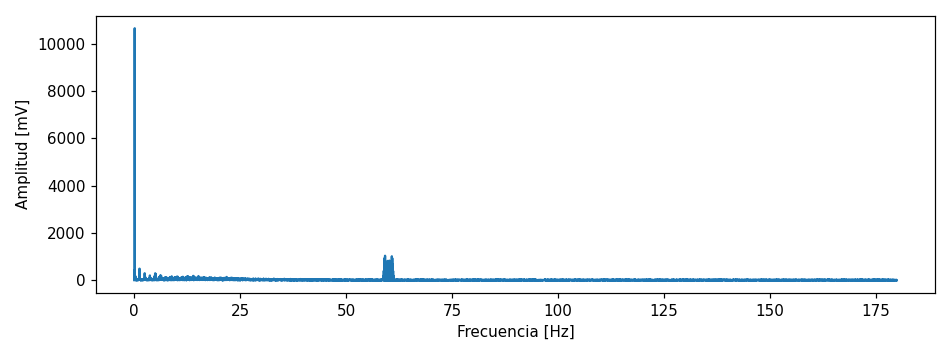

In [3]:
import scipy.fft as sfft

f = sfft.rfftfreq(n=len(time), d=1/Fs)
X = sfft.rfft(data) 

fig, ax = plt.subplots(1, 1, figsize=(8, 3), tight_layout=True)

ax.plot(f, np.absolute(X))

ax.set_xlabel('Frecuencia [Hz]')
ax.set_ylabel('Amplitud [mV]');

<IPython.core.display.Javascript object>


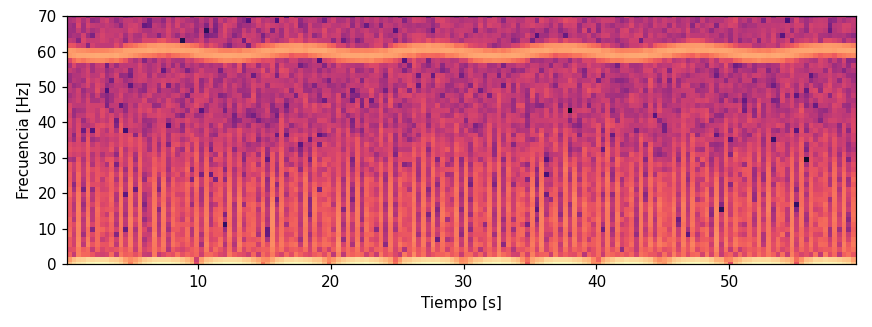

(0.0, 70.0)

In [5]:
import scipy.signal
from IPython.display import Audio

Nw = 256
beta = 6.0

fig, ax = plt.subplots(1, figsize=(8, 3), tight_layout=True)
 
freq, ttime, Sxx = scipy.signal.spectrogram(data, 
                                            fs=Fs, 
                                            window=('kaiser', beta), #tipo y largo de ventana
                                            nperseg=Nw, #largo de ventana
                                            noverlap=Nw//2, #cuanto se traslapa
                                            detrend=False,
                                            return_onesided=True, 
                                            scaling='density', 
                                            mode='magnitude')
ax.pcolormesh(ttime, 
              freq, 
              np.log10(Sxx + 1e-5), 
              cmap=plt.cm.magma, 
              shading='auto');

ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Frecuencia [Hz]');
ax.set_ylim([0,70])

__R__: Considerando que el intervalo normal o duración normal del complejo QRS para un humano es entre 60 milisegundos y 100 milisegundos [2], decidimos usar una ventana kaiser con un largo beta de 6, ya que aquí podemos encontrar el intermedio entre eliminar la mayor cantidad de lóbulos laterales, y que el ancho del lóbulo principal se encuentre en el rango normal (entre 60 y 100 milisegundos) con buena resolución.

### 1.3 En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?

__R__: La señal fue contaminada por tres tipos de ruidos, y podemos inferir lo siguiente:

- El ruido provocado por el sistema eléctrico está entre los 50 y 70 Hz. Ocurre porque alrededor de los conductores se produce un campo magnético entre esa frecuencia [1]. Esto se puede ver claramente en los gráficos. 
- El ruido de baja frecuencia causado por un desperfecto del sensor, puede estar manifestándose entre 0 y 5 Hz, tal como muestran los gráficos.
- El ruido blanco de origen térmico está presente en todo el rango de frecuencia y como no sigue un comportamiento definido, resulta difícil eliminarlo con exactitud, a diferencia del ruido provocado por el sistema eléctrico que tiene un comportamiento mejor definido.

Por lo tanto, el rango de frecuencia donde se espera encontrar la señal es entre 0 y 50 Hz

## Filtrado FIR (50%)

Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Luego use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido **(A)**, el segundo el ruido **(B)** y el tercero el ruido **(C)**. Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

Considere una ventana de Hamming y $1001$ coeficientes para el filtro

Por cada filtro:
- Muestre la respuesta al impulso y la respuesta en frecuencia resultantes
- Filtre la señal convolucionando con la respuesta al impulso
- Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

Finalmente
- Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente. 
- Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada.
- Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

### 2.1 Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`.

__R__: Fitro FIR son filtros digitales con memoria (su salida depende la entrada actual y la anterior) y finitos, cuyo objetivo es reducir o resaltar un aspecto específico de una señal. Dan como salida una señal modificada dependiendo de estas características que se quieren resaltar con el filtro. 

El método de ventana es un algoritmo de diseño de filtro. Se parte primero especificando la respuesta en frecuencia, $H_d[k]$, dependiendo del aspecto que se requiere. Luego, se obtiene la respuesta al impulso ideal, $h_d[n]$ , a través de la transformada de Fourier inversa. Por último, se debe truncar la respuesta impulsional, $h[n] = h_d[n]w[n]$, donde $w[n]$ es la ventana.

En la función `scipy.signal.firwin(numtaps,cutoff,window='hamming,pass_zero=True,fs=None,)`:

- numtaps: es el largo del filtro (número de coeficientes)
- cutoff: es la frecuencia de corte del filtro o una matriz de frecuencia de corte (frecuencias que son los bordes)
- window: venta que se va a usar (hamming, hann, etc)
- pass_zero: si es "True" la ganancia de la frecuencia 0 es 1. {True, False, ‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’}.
- fs: es la frecuencia de muestreo de la señal.

La función retorna un arreglo h, la respuesta al impulso del filtro FIR.

### 2.2 Use este método para diseñar y aplicar tres filtros sobre la señal de entrada

__R__: 
- Para disminuir el ruido A utilizaremos un filtro rechaza banda entre las frecuencias 50 y 70 Hz, ya que este es el rango en el que se encuentra el ruido A, según lo analizado en la primera parte.
- Para disminuir el ruido B utilizaremos un filtro pasa alto con frecuencia de corte 5 Hz, ya que este ruido se encuentra entre 0 y 5 Hz.
- Para el ruido C utilizaremos un filtro el pasa bajo con frecuencia de corte 50 Hz, ya que el rango de frecuencia en el que se encuentra la señal a buscar tiene un límite de 50 Hz. Con el filtro solo disminuiríamos la influencia del ruido C que está en todos lados. 

### 2.3 Muestre la respuesta al impulso y la respuesta en frecuencia resultantes

In [6]:
fcA = [50, 70] 
L = 1000+1 

window = 'hamming'

<IPython.core.display.Javascript object>


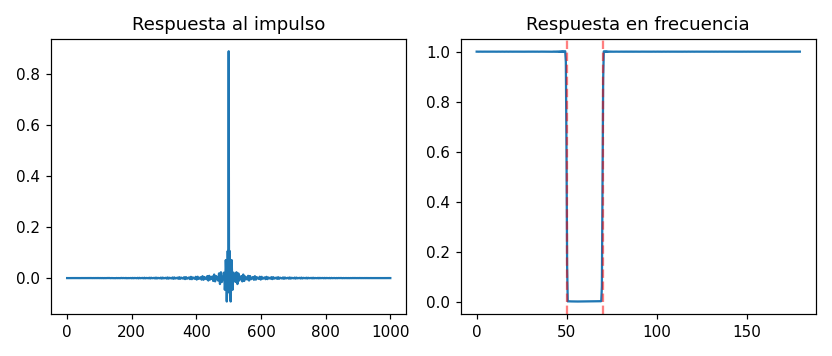

Text(0.5, 1.0, 'Respuesta en frecuencia')

In [7]:
# FILTRO A: RECHAZA BANDA

hA = scipy.signal.firwin(numtaps=L,cutoff= fcA, window=window, pass_zero = True, fs=360)

freqA, HA = scipy.signal.freqz(hA, fs=Fs)

fig, ax = plt.subplots(1,2,figsize=(7,3), tight_layout = True)
ax[0].plot(hA)
ax[0].set_title("Respuesta al impulso")
ax[1].plot(freqA,np.absolute(HA))
ax[1].axvline(fcA[0],c='r', ls='--',alpha=0.5)
ax[1].axvline(fcA[1],c='r', ls='--',alpha=0.5)
ax[1].set_title("Respuesta en frecuencia")

<IPython.core.display.Javascript object>


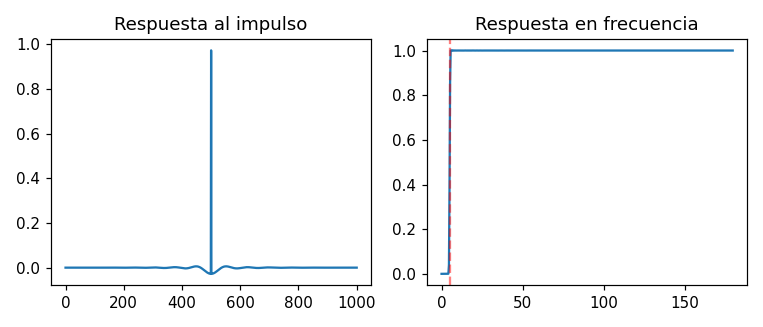

Text(0.5, 1.0, 'Respuesta en frecuencia')

In [9]:
# FILTRO B, PASA ALTO

fcB = 5
hB = scipy.signal.firwin(numtaps=L,cutoff=fcB, window=window, pass_zero = False, fs=360)

freqB, HB = scipy.signal.freqz(hB,fs=360)

fig, ax = plt.subplots(1,2,figsize=(7,3), tight_layout = True)
ax[0].plot(hB)
ax[0].set_title("Respuesta al impulso")
ax[1].plot(freqB,np.absolute(HB))
ax[1].axvline(fcB,c='r', ls='--',alpha=0.5)
ax[1].set_title("Respuesta en frecuencia")

<IPython.core.display.Javascript object>


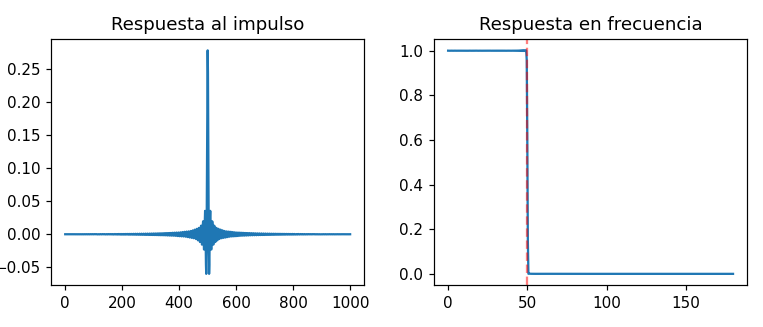

Text(0.5, 1.0, 'Respuesta en frecuencia')

In [11]:
# FILTRO C: PASA BAJO

fcC = 50
hC = scipy.signal.firwin(numtaps=L,cutoff=fcC, window=window, pass_zero = True, fs=360)
freqC, HC = scipy.signal.freqz(hC, fs=Fs)

fig, ax = plt.subplots(1,2,figsize=(7,3), tight_layout = True)
ax[0].plot(hC)
ax[0].set_title("Respuesta al impulso")
ax[1].plot(freqC,np.absolute(HC))
ax[1].axvline(fcC,c='r', ls='--',alpha=0.5)
ax[1].set_title("Respuesta en frecuencia")

### 2.4 Filtre la señal convolucionando con la respuesta al impulso y Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

<IPython.core.display.Javascript object>


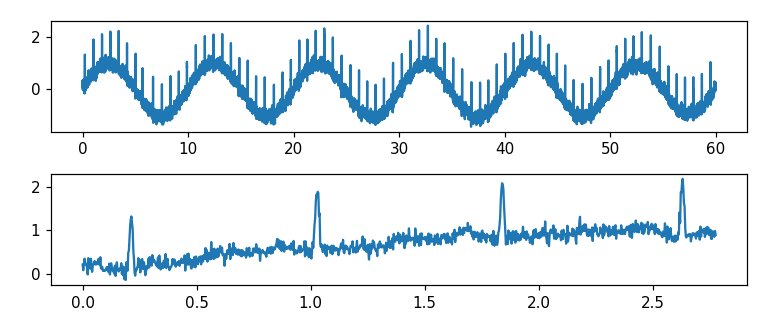

In [12]:
# FILTRO A

fig, ax = plt.subplots(2,1,figsize=(7,3), tight_layout = True)

yA = scipy.signal.convolve(data,hA,mode='same')
YA = sfft.rfft(yA)
freqs = sfft.rfftfreq(n=len(yA),d=1/Fs)

ax[0].plot(time[:len(yA)],yA)
ax[1].plot(time[:1000], yA[:1000])

<IPython.core.display.Javascript object>


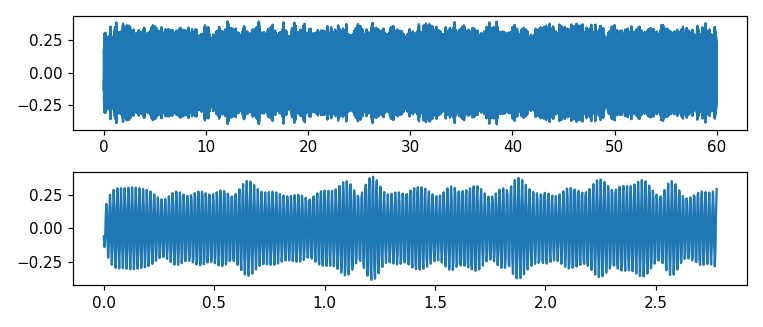

In [13]:
# RESTA DE SEÑALES

signA = data - yA

fig, ax = plt.subplots(2,1,figsize=(7,3), tight_layout = True)

ax[0].plot(time, signA)
ax[1].plot(time[:1000], signA[:1000])

<IPython.core.display.Javascript object>


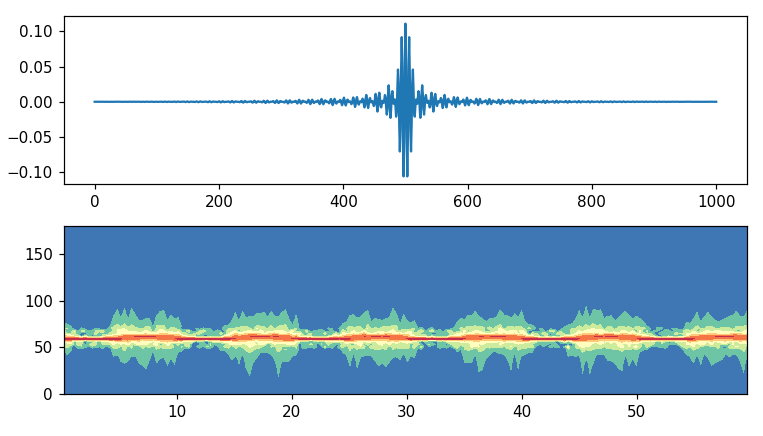

In [15]:
fig, ax = plt.subplots(2,1,figsize=(7,4), tight_layout = True)

h1 = scipy.signal.firwin(numtaps=L,cutoff=fcA, window=window, pass_zero = False, fs=360)

freq1, H1 = scipy.signal.freqz(h1,fs=360)

freqs1, times1, Sxx = scipy.signal.spectrogram(signA, fs=360.0, nperseg=128, detrend=False,window=('tukey', 0), noverlap=None)
Times1, Freqs1 = np.meshgrid(times1, freqs1);

ax[0].plot(h1)
ax[1].contourf(Times1, Freqs1, 20*np.log10(Sxx+1e-5), cmap=plt.cm.Spectral_r); 

<IPython.core.display.Javascript object>


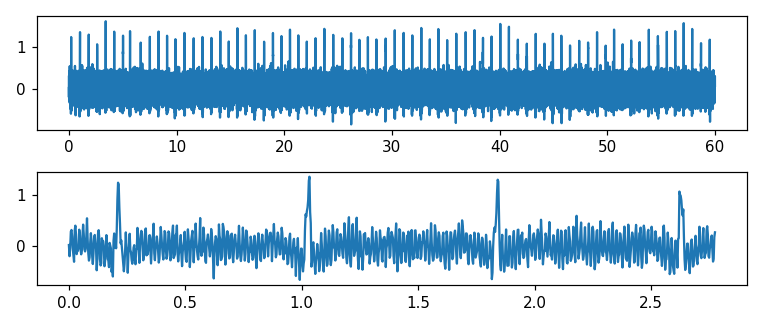

In [16]:
# FILTRO B

fig, ax = plt.subplots(2,1,figsize=(7,3), tight_layout = True)

yB = scipy.signal.convolve(data,hB,mode='same')
YB = sfft.rfft(yB)
freqs = sfft.rfftfreq(n=len(yB),d=1/Fs)

ax[0].plot(time[:len(yB)],yB)
ax[1].plot(time[:1000], yB[:1000]) #muestra más ampliada

<IPython.core.display.Javascript object>


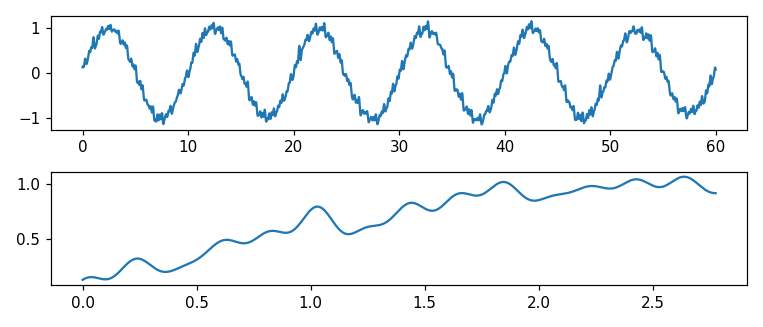

In [17]:
# RESTA DE SEÑALES

signB = data - yB

fig, ax = plt.subplots(2,1,figsize=(7,3), tight_layout = True)

ax[0].plot(time, signB)
ax[1].plot(time[:1000], signB[:1000])

<IPython.core.display.Javascript object>


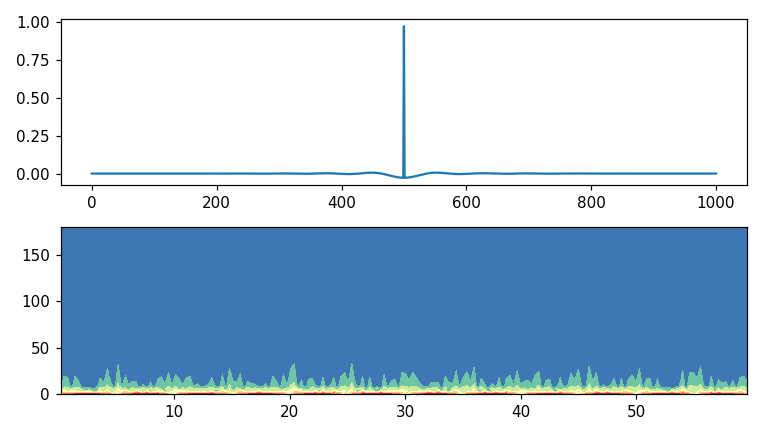

In [18]:
fig, ax = plt.subplots(2,1,figsize=(7,4), tight_layout = True)

h2 = scipy.signal.firwin(numtaps=L,cutoff=fcB, window=window, pass_zero = False, fs=360)

freq2, H2 = scipy.signal.freqz(h2,fs=360)

freqs2, times2, Sxx = scipy.signal.spectrogram(signB, fs=360.0, nperseg=128, detrend=False,window=('tukey', 0), noverlap=None)
Times2, Freqs2 = np.meshgrid(times2, freqs2);

ax[0].plot(h2)
ax[1].contourf(Times2, Freqs2, 20*np.log10(Sxx+1e-5), cmap=plt.cm.Spectral_r); 

<IPython.core.display.Javascript object>


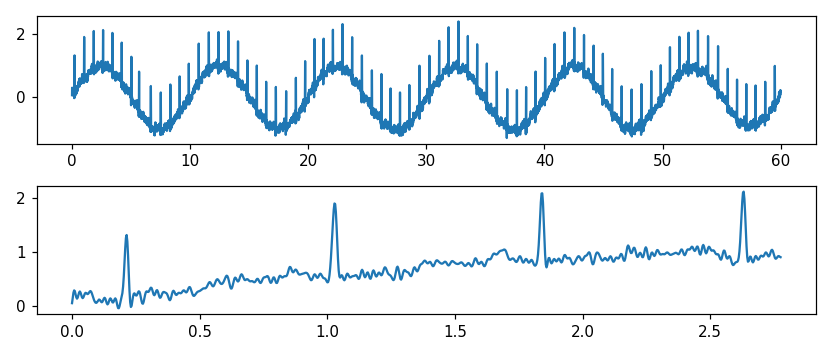

In [19]:
# FILTRO C

fig, ax = plt.subplots(2,1,figsize=(7,3), tight_layout = True)

yC = scipy.signal.convolve(data,hC,mode='same')
YC = sfft.rfft(yC)
freqs = sfft.rfftfreq(n=len(yC),d=1/Fs)

ax[0].plot(time[:len(yC)],yC)
ax[1].plot(time[:1000], yC[:1000]) #muestra más ampliada

<IPython.core.display.Javascript object>


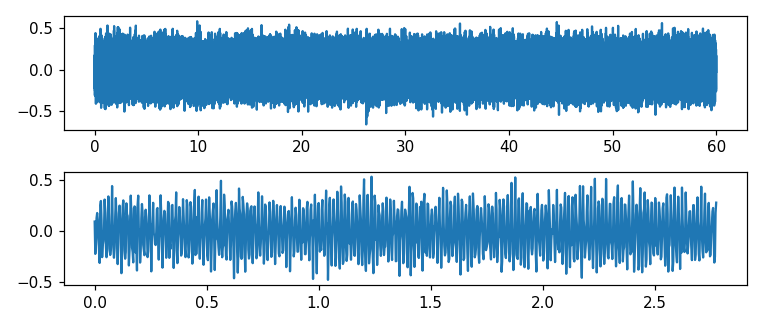

In [20]:
# RESTA DE SEÑALES

signC = data - yC

fig, ax = plt.subplots(2,1,figsize=(7,3), tight_layout = True)

ax[0].plot(time, signC)
ax[1].plot(time[:1000], signC[:1000])

<IPython.core.display.Javascript object>


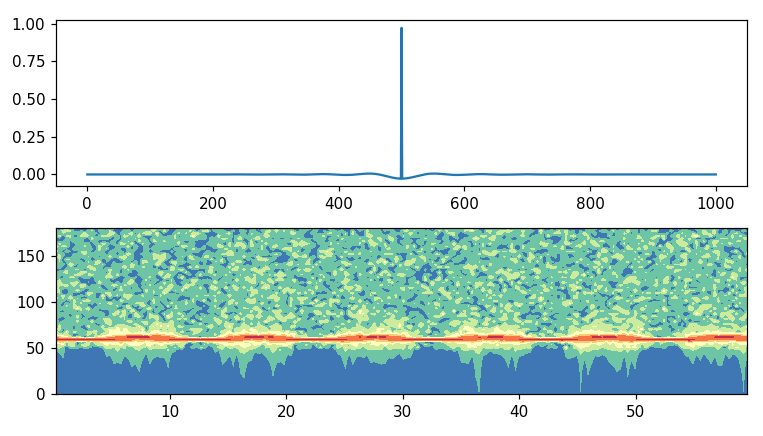

In [21]:
fig, ax = plt.subplots(2,1,figsize=(7,4), tight_layout = True)

h3 = scipy.signal.firwin(numtaps=L,cutoff=fcC, window=window, pass_zero = False, fs=360)

freq3, H3 = scipy.signal.freqz(h3,fs=360)

freqs2, times2, Sxx = scipy.signal.spectrogram(signC, fs=360.0, nperseg=128, detrend=False,window=('tukey', 0), noverlap=None)
Times2, Freqs2 = np.meshgrid(times2, freqs2);

ax[0].plot(h2)
ax[1].contourf(Times2, Freqs2, 20*np.log10(Sxx+1e-5), cmap=plt.cm.Spectral_r); 

### 2.5 Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente y Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada

<IPython.core.display.Javascript object>


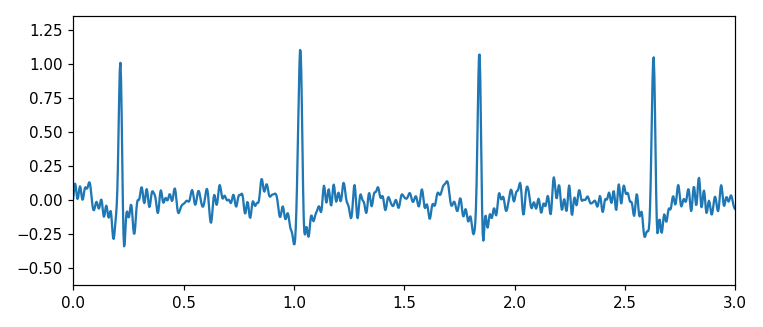

(0.0, 3.0)

In [22]:
# FILTRADO DE SEÑALES 

fig, ax = plt.subplots(1,figsize=(7,3), tight_layout = True)

yA = scipy.signal.convolve(data,hA,mode='same')
yB = scipy.signal.convolve(yA,hB,mode='same')
yC = scipy.signal.convolve(yB,hC,mode='same')

Y = sfft.rfft(yC)
freqs = sfft.rfftfreq(n=len(yC),d=1/Fs)

ax.plot(time[:len(yC)],yC)
ax.set_xlim([0,3])

Las fases R se pueden ver en los cuatro picos en la gráfica

### 2.7 Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

## Filtrado IIR (35%)

Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

El objetivo es encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. Es decir que si $x$ es la señal filtrada IIR e $y$ es la señal filtrada FIR donde $N = \min(\text{len}(x), \text{len}(y))$ se cumpla que

$$
\sum_{i=1}^N (x_i - y_i)^2 < 0.01 \sum_{i=1}^N (y_i - \bar y_i)^2
$$

Finalmente, discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR


### 3.1 Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

__R__: Los filtros IIR requieren menos coeficientes para hacer operaciones de filtrado que los filtros FIT, por lo tanto los filtros IIR se ejecutan más rápido y no requieren de memoria extra. Por otra parte la naturaleza recursiva de los filtros IRR hace que sean más dificiles de diseñar e implementar. Se deben usar los filtros FIR para las aplicaciones que requieren respuesta de fase lineal, ya que en de los filtros IIR la respuesta de fase es no lineal [3]. 
La diferencia más básica entre los filtros FIR e IIR es que para los filtros IIR, la salida solo depende de la corriente y de los valores de entrada pasados, mientras que en los filtros IIR, la salida depende no solo en la corriente y valores de entrada pasados sino que también en los valores de salida pasados.

~~~python
scipy.signal.iirfilter(N, Wn, fs, btype='bandpass', ftype='butter', output='ba', ...)
~~~

* `N`: orden del filtro (entero)
* `Wn`: Frecuencias de corte, Secuencia escalar o de longitud 2 que proporciona las frecuencias críticas.
* `Fs`: frecuencia de muestreo del sistema (float)
* `btype`: tipo de filtro, el valor predeterminado en bandpass
* `ftype`: tipo de filtro a diseñar, 'butter', 'ellip', 'cheby1', 'cheby2', 'bessel
* `output`: retorno de coeficientes. 
    * Retornará el numerados 'b' y el denominador 'a', si output='ba'
    * Retornará ceros, polos y ganancia del sistema de la función de transferencia del filtro IIR, si output='zpk'
    * Retornará la representación de secciones de segundo orden del filtro IIR, si output='sos'

### 3.2 Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

In [23]:
order = 150

/home/esteban/anaconda3/lib/python3.8/site-packages/scipy/signal/filter_design.py:687: UserWarning: The group delay is singular at frequencies [0.522, 0.528, 0.534, 0.540, 0.546, 0.552, 0.558, 0.565, 0.571, 0.577, 0.583, 0.589, 0.595, 0.601, 0.607, 0.614, 0.620, 0.626, 1.037, 1.043, 1.049, 1.055, 1.062, 1.068, 1.074, 1.080, 1.086, 1.092, 1.098, 1.104, 1.111, 1.117, 1.123, 1.129, 1.135, 1.141, 1.147, 1.154, 1.160, 1.166, 1.172, 1.178, 1.184, 1.190, 1.197, 1.203, 1.209, 1.215, 1.221, 1.227, 1.233, 1.239, 1.246, 1.252, 1.258, 1.264, 1.270, 1.276, 1.282, 1.289, 1.295, 2.780, 2.786, 2.792, 2.798, 2.804, 2.810, 2.816], setting to 0
  warnings.warn(


<IPython.core.display.Javascript object>


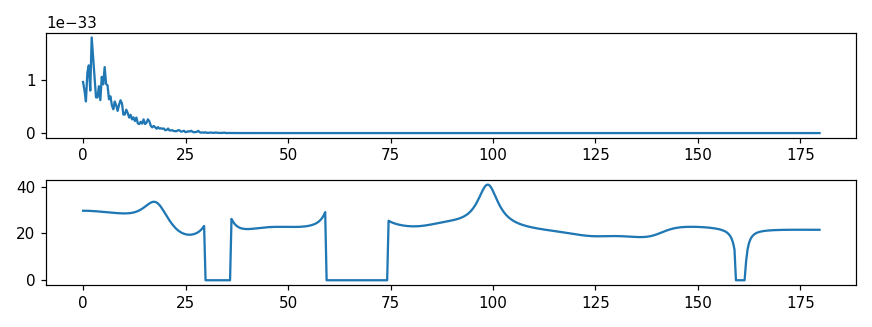

In [24]:
b, a = scipy.signal.iirfilter(N=order, 
                              Wn=50,
                              fs=Fs, 
                              ftype='butter', 
                              btype='lowpass')

freq_iir, response_iir = scipy.signal.freqz(b, a, fs=Fs)
freq_iir, delay_iir = scipy.signal.group_delay(system=(b, a), fs=Fs)

fig, ax = plt.subplots(2, figsize=(8, 3), tight_layout=True)
ax[0].plot(freq_iir, np.absolute(response_iir))
ax[1].plot(freq_iir, delay_iir)

<IPython.core.display.Javascript object>


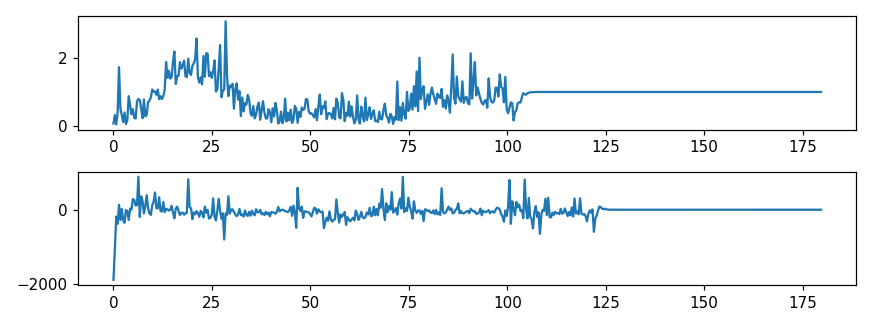

In [25]:
b, a = scipy.signal.iirfilter(N=order, 
                              Wn=5, 
                              fs=Fs, 
                              ftype='butter', 
                              btype='highpass')

freq_iir, response_iir = scipy.signal.freqz(b, a, fs=Fs)
freq_iir, delay_iir = scipy.signal.group_delay(system=(b, a), fs=Fs)

fig, ax = plt.subplots(2, figsize=(8, 3), tight_layout=True)
ax[0].plot(freq_iir, np.absolute(response_iir))
ax[1].plot(freq_iir, delay_iir)

<IPython.core.display.Javascript object>


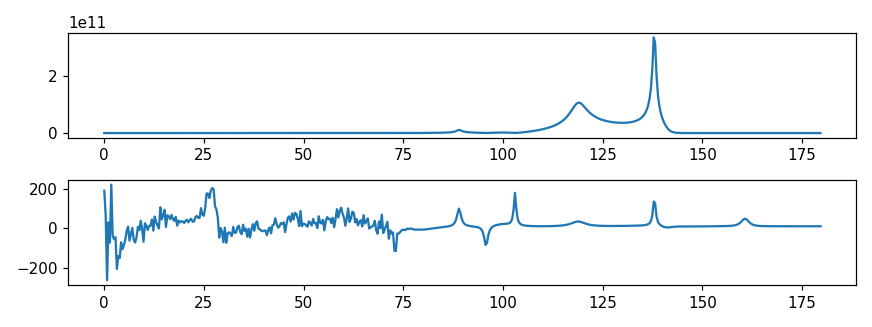

In [26]:
b, a = scipy.signal.iirfilter(N=order, 
                              Wn=[50,70], 
                              fs=Fs, 
                              ftype='butter', 
                              btype='bandstop')

freq_iir, response_iir = scipy.signal.freqz(b, a, fs=Fs)
freq_iir, delay_iir = scipy.signal.group_delay(system=(b, a), fs=Fs)

fig, ax = plt.subplots(2, figsize=(8, 3), tight_layout=True)
ax[0].plot(freq_iir, np.absolute(response_iir))
ax[1].plot(freq_iir, delay_iir)

### 3.3 Encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR

In [34]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas

#para encontrar varianza de la señal FIR
varianza= np.var(Y)
#calcular el 1% de la varianza
por=np(np.var/100)

#error medio cuadratico

y_true = [3, -0.5, 2, 7] #señales IIR FIR
y_pred = [2.5, 0.0, 2, 8]
mse = (np.square(y_true - y_pred)).mean()

TypeError: unsupported operand type(s) for /: 'function' and 'int'

### 3.4 Discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR

__R__:

## Referencias

* [1] https://es.wikipedia.org/wiki/Ruido_el%C3%A9ctrico
* [2] https://www.cmzh.com.mx/media/108934/rev_24_elelectricardiogramasutecnologia.pdf
* [3] http://www.ehu.eus/procesadoinsvirtual/T6_filtros%20iir%20y%20fir5.html